# **Spotify Data Analysis**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("/content/spotify_songs.csv")

In [4]:
df.head().T

,0,1,2,3,4
track_id,6f807x0ima9a1j3VPbc7VN,0r7CVbZTWZgbTCYdfa2P31,1z1Hg7Vb0AhHDiEmnDE79l,75FpbthrwQmzHlBJLuGdC7,1e8PAfcKUYoKkxPhrHqw4x
track_name,I Don't Care (with Justin Bieber) - Loud Luxur...,Memories - Dillon Francis Remix,All the Time - Don Diablo Remix,Call You Mine - Keanu Silva Remix,Someone You Loved - Future Humans Remix
track_artist,Ed Sheeran,Maroon 5,Zara Larsson,The Chainsmokers,Lewis Capaldi
track_popularity,66,67,70,60,69
track_album_id,2oCs0DGTsRO98Gh5ZSl2Cx,63rPSO264uRjW1X5E6cWv6,1HoSmj2eLcsrR0vE9gThr4,1nqYsOef1yKKuGOVchbsk6,7m7vv9wlQ4i0LFuJiE2zsQ
track_album_name,I Don't Care (with Justin Bieber) [Loud Luxury...,Memories (Dillon Francis Remix),All the Time (Don Diablo Remix),Call You Mine - The Remixes,Someone You Loved (Future Humans Remix)
track_album_release_date,2019-06-14,2019-12-13,2019-07-05,2019-07-19,2019-03-05
playlist_name,Pop Remix,Pop Remix,Pop Remix,Pop Remix,Pop Remix
playlist_id,37i9dQZF1DXcZDD7cfEKhW,37i9dQZF1DXcZDD7cfEKhW,37i9dQZF1DXcZDD7cfEKhW,37i9dQZF1DXcZDD7cfEKhW,37i9dQZF1DXcZDD7cfEKhW
playlist_genre,pop,pop,pop,pop,pop


In [5]:
df.drop(["track_id", "track_album_id", "playlist_id"], axis = 1, inplace = True)

In [6]:
for col in (
    "track_popularity",
    "playlist_genre",
    "playlist_subgenre",
    "key",
    "mode"
    ):
  print(col, ':', df[col].unique())
  print("\n" + '-' * 10 + "\n")

track_popularity : [ 66  67  70  60  69  62  68  58  63  65  35  64   8  30  56  55  59  87
  83  61  57  53  34  74  46  52  45  51  48  39  71  81  85  76  75  73
  79  16  84  37  36  72  77  82  41   5  24  18  47  80  96  86  19  27
  43  91  42  21  54   9  23  40   2  11  50  10  49   6  25  95   1   4
  28  29  38  17  31  26  32  12  44   7   0  13  78  88  94  22  98  97
  90  93  92   3  33  20  14  15  89 100  99]

----------

playlist_genre : ['pop' 'rap' 'rock' 'latin' 'r&b' 'edm']

----------

playlist_subgenre : ['dance pop' 'post-teen pop' 'electropop' 'indie poptimism' 'hip hop'
 'southern hip hop' 'gangster rap' 'trap' 'album rock' 'classic rock'
 'permanent wave' 'hard rock' 'tropical' 'latin pop' 'reggaeton'
 'latin hip hop' 'urban contemporary' 'hip pop' 'new jack swing'
 'neo soul' 'electro house' 'big room' 'pop edm'
 'progressive electro house']

----------

key : [ 6 11  1  7  8  5  4  2  0 10  9  3]

----------

mode : [1 0]

----------



In [7]:
df["track_album_release_year"] = [
    int(date[:4])
    for date in df["track_album_release_date"]
    ]

In [8]:
df["track_album_release_year"].head()

0    2019
1    2019
2    2019
3    2019
4    2019
Name: track_album_release_year, dtype: int64

In [9]:
print("Latest Year Of Data :", df["track_album_release_year"].max())
print("Oldest Year Of Data :", df["track_album_release_year"].min())

Latest Year Of Data : 2020
Oldest Year Of Data : 1957


In [10]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_album_release_year
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622,2011.137270
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182,11.417451
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000,1957.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000,2008.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000,2016.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000,2019.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000,2020.000000


In [11]:
print("Unique Artists :", df["track_artist"].unique().shape[0])

Unique Artists : 10693


Text(0.5, 1.0, 'Top 107 Popular Songs in Spotify')

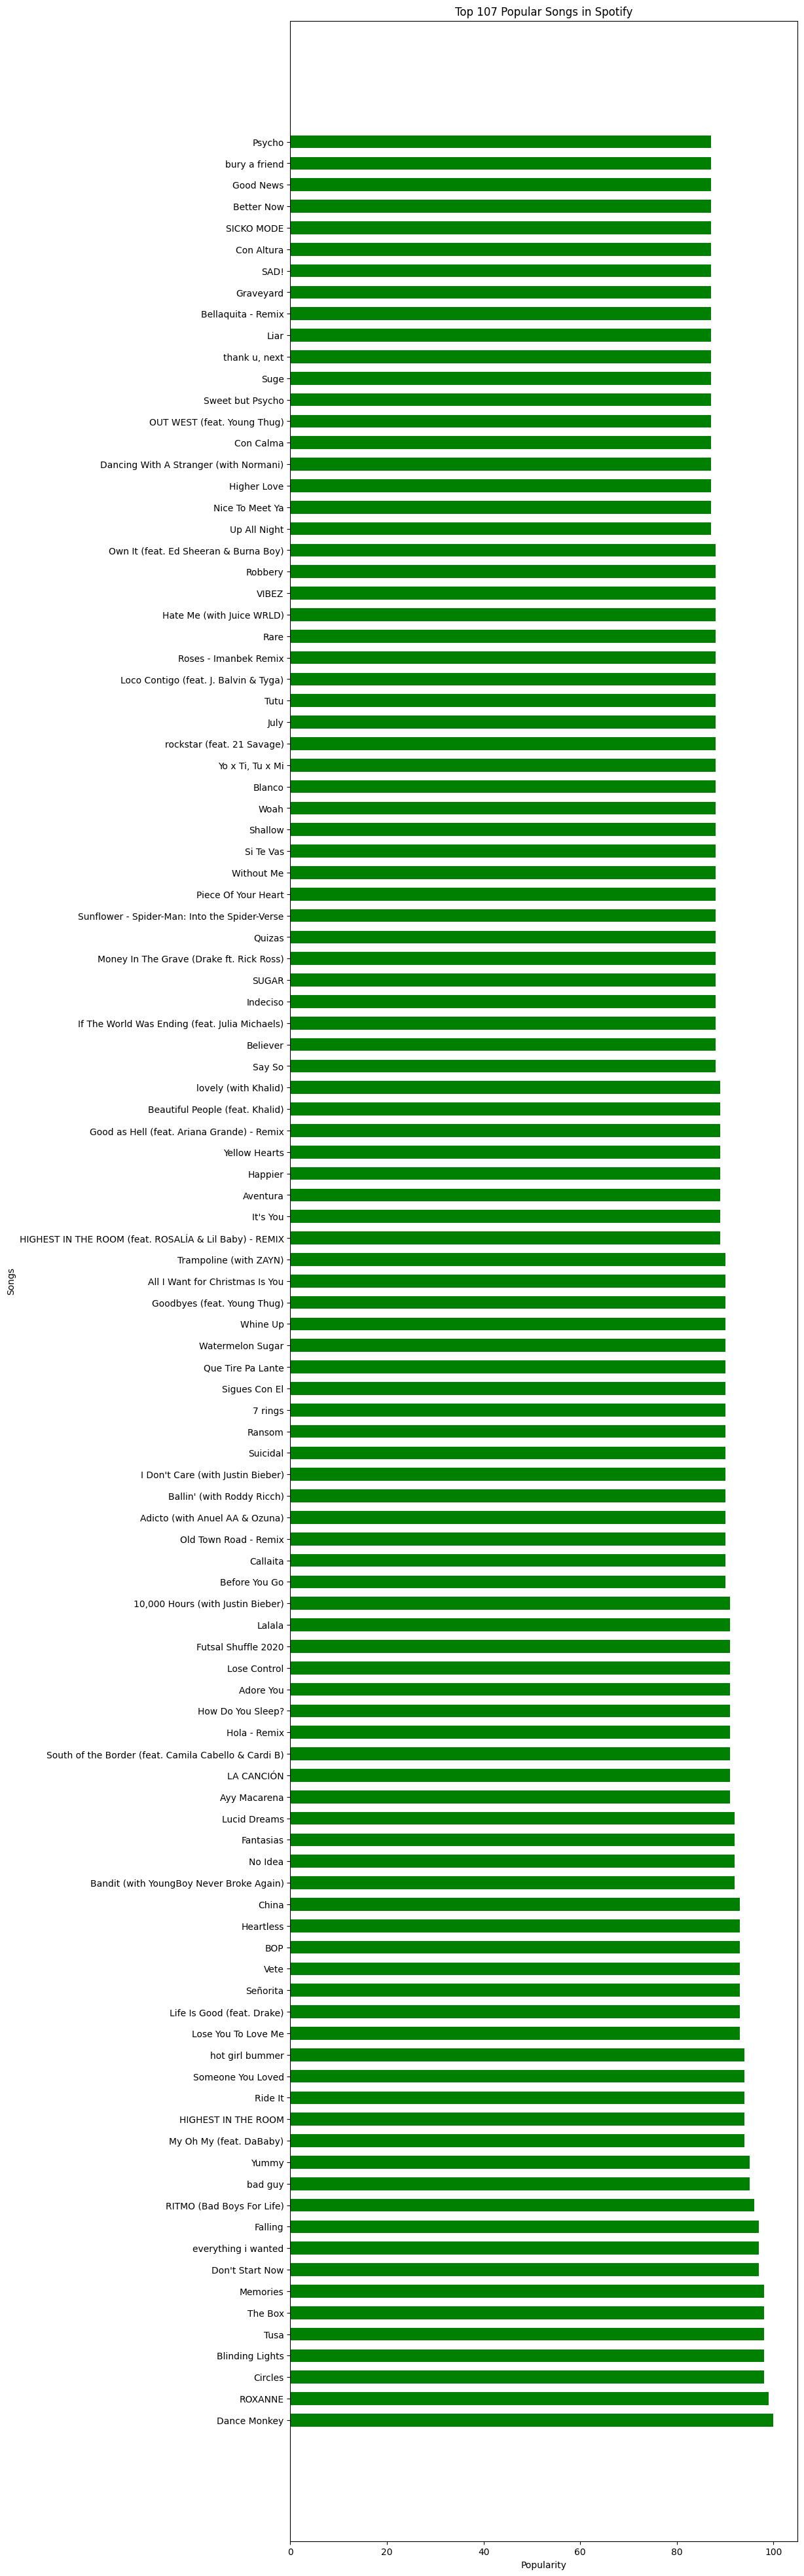

In [12]:
df_popularity = df.sort_values(by = "track_popularity", ascending = False)

fig = plt.figure(figsize = (10, 50))

plt.barh(
    y = [i for i in df_popularity["track_name"].values[:500]],
    width = [i for i in df_popularity["track_popularity"].values[:500]],
    height = 0.6,
    color = "green"
)

plt.ylabel("Songs")
plt.xlabel("Popularity")
plt.title(f"Top {df_popularity['track_name'][:500].unique().shape[0]} Popular Songs in Spotify")

In [13]:
artists_top107songs_count : dict = {}

for artist in df_popularity["track_artist"].values[:500]:

  if artist in artists_top107songs_count:
    artists_top107songs_count[artist] += 1

  else:
    artists_top107songs_count[artist] = 1

In [14]:
sorted_top_artists_count : dict = dict(
    sorted(
        artists_top107songs_count.items(),
        key = lambda x : x[1],
        reverse = True
        )
    )

In [15]:
sorted_top_artists_count

{'Travis Scott': 23,
 'Billie Eilish': 18,
 'Post Malone': 17,
 'Ed Sheeran': 15,
 'Harry Styles': 15,
 'Selena Gomez': 14,
 'The Weeknd': 13,
 'Shawn Mendes': 13,
 'Camila Cabello': 12,
 'MEDUZA': 12,
 'Lewis Capaldi': 11,
 'Bad Bunny': 11,
 'Juice WRLD': 11,
 'DaBaby': 10,
 'Halsey': 10,
 'ROSALÍA': 10,
 'J Balvin': 9,
 'Roddy Ricch': 8,
 'Maroon 5': 8,
 'Dua Lipa': 8,
 'Regard': 8,
 'Sam Smith': 8,
 'Daddy Yankee': 8,
 'KAROL G': 7,
 'The Black Eyed Peas': 7,
 'Justin Bieber': 7,
 'blackbear': 7,
 'Future': 7,
 'Anuel AA': 7,
 'Rauw Alejandro': 7,
 'Tyga': 7,
 'Dalex': 7,
 'Y2K': 7,
 'Drake': 7,
 'Tones and I': 6,
 'Trevor Daniel': 6,
 'Don Toliver': 6,
 'Lil Uzi Vert': 6,
 'YNW Melly': 6,
 'BROCKHAMPTON': 6,
 'Kygo': 6,
 'Dan + Shay': 5,
 'Tainy': 5,
 'Ariana Grande': 5,
 'Doja Cat': 5,
 'Khalid': 5,
 'Arizona Zervas': 4,
 'Lil Nas X': 4,
 'Mustard': 4,
 'Dimelo Flow': 4,
 'Lunay': 4,
 'Marshmello': 4,
 'Lizzo': 4,
 'JP Saxe': 4,
 'Reik': 4,
 'Sech': 4,
 'Lil Baby': 4,
 'Noah Cyrus

In [16]:
sorted_top_artists_count : list = list(iter(sorted_top_artists_count.items()))

Text(0, 0.5, 'Artist')

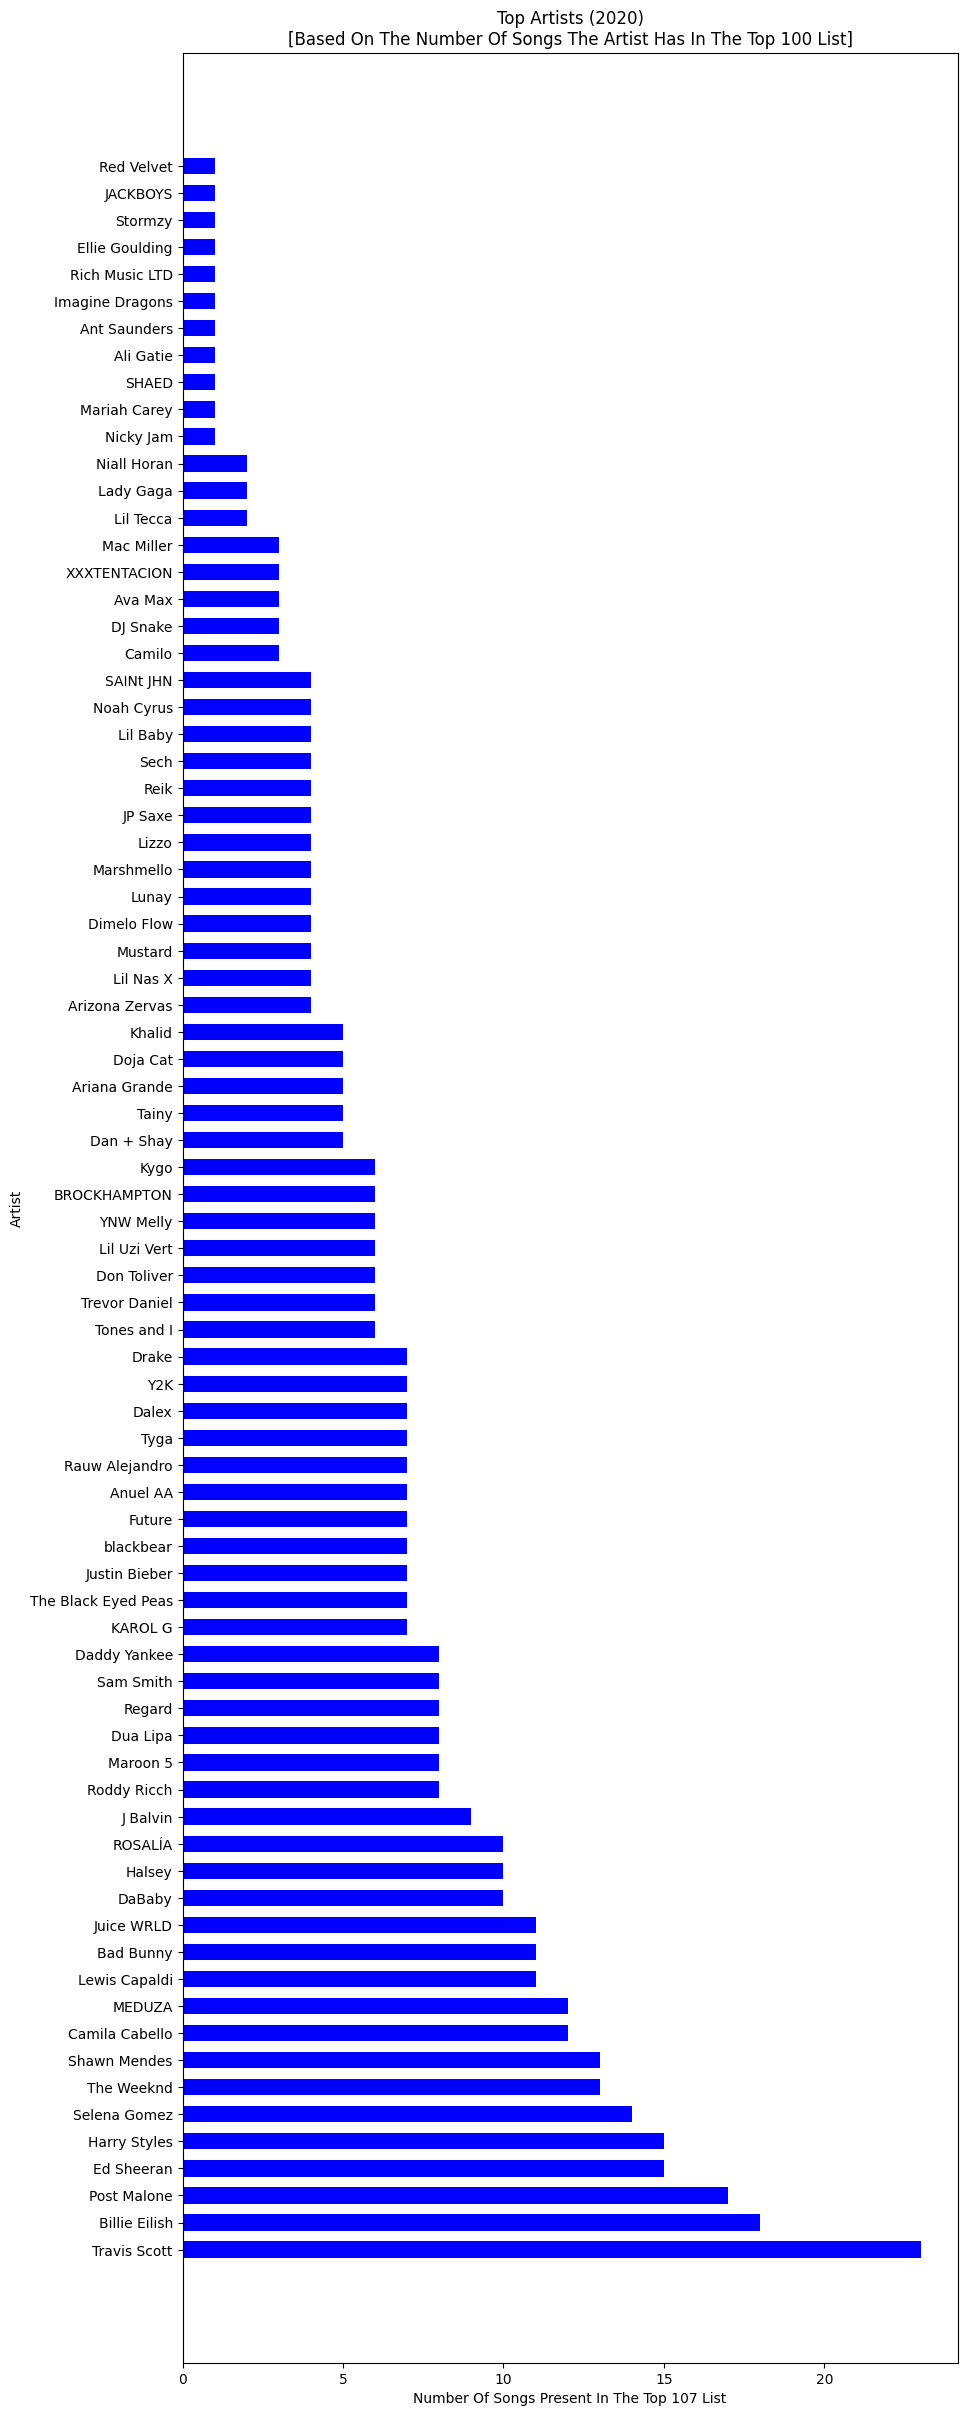

In [37]:
fig = plt.figure(figsize = (10, 30))

plt.barh(
    y = [sorted_top_artists_count[i][0] for i in range(len(sorted_top_artists_count))],
    width = [sorted_top_artists_count[i][1] for i in range(len(sorted_top_artists_count))],
    height = 0.6,
    color = "blue"
)

plt.title("Top Artists (2020)\n[Based On The Number Of Songs The Artist Has In The Top 100 List]")
plt.xlabel("Number Of Songs Present In The Top 107 List")
plt.ylabel("Artist")


In [18]:
artists_songs_count : dict = {}

for artist in df["track_artist"].values:

  if artist in artists_songs_count:
    artists_songs_count[artist] += 1

  else:
    artists_songs_count[artist] = 1

In [19]:
sorted_artists_count : dict = dict(
    sorted(
        artists_songs_count.items(),
        key = lambda x : x[1],
        reverse = True
        )
    )

In [20]:
sorted_artists_count : list = list(iter(sorted_artists_count.items()))

Text(0.5, 1.0, 'Number Of Songs published by artists')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12458 (\N{KATAKANA LETTER O}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12513 (\N{KATAKANA LETTER ME}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12460 (\N{KATAKANA LETTER GA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  func(*args, **kw

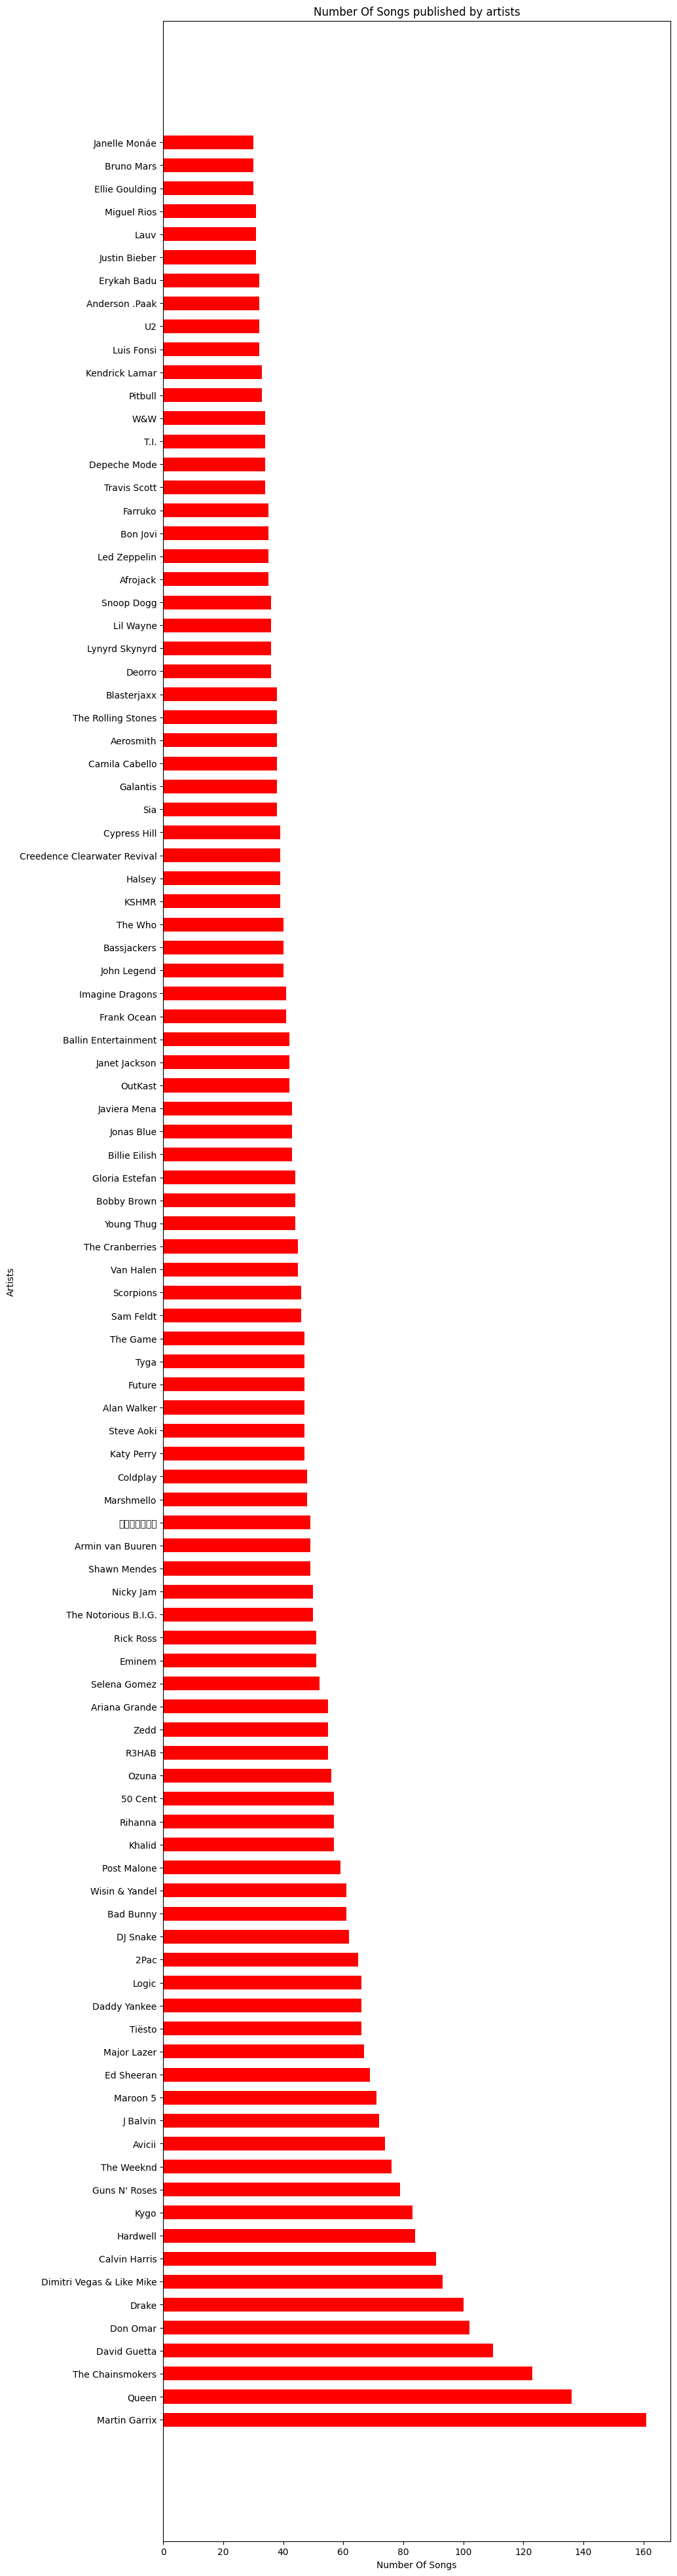

In [21]:
fig = plt.figure(figsize = (10, 50))

plt.barh(
    y = [sorted_artists_count[i][0] for i in range(100)],
    width = [sorted_artists_count[i][1] for i in range(100)],
    height = 0.6,
    color = "red"
)

plt.xlabel("Number Of Songs")
plt.ylabel("Artists")
plt.title("Number Of Songs published by artists")

In [22]:
years_of_release : dict = {}

for year in df["track_album_release_year"].values:

  if year in years_of_release:
    years_of_release[year] += 1

  else:
    years_of_release[year] = 1

In [23]:
sorted_years_count : dict = dict(
    sorted(
        years_of_release.items(),
        key = lambda x : x[0],
        reverse = True
        )
    )

Text(0.5, 1.0, 'Songs Released Every Year')

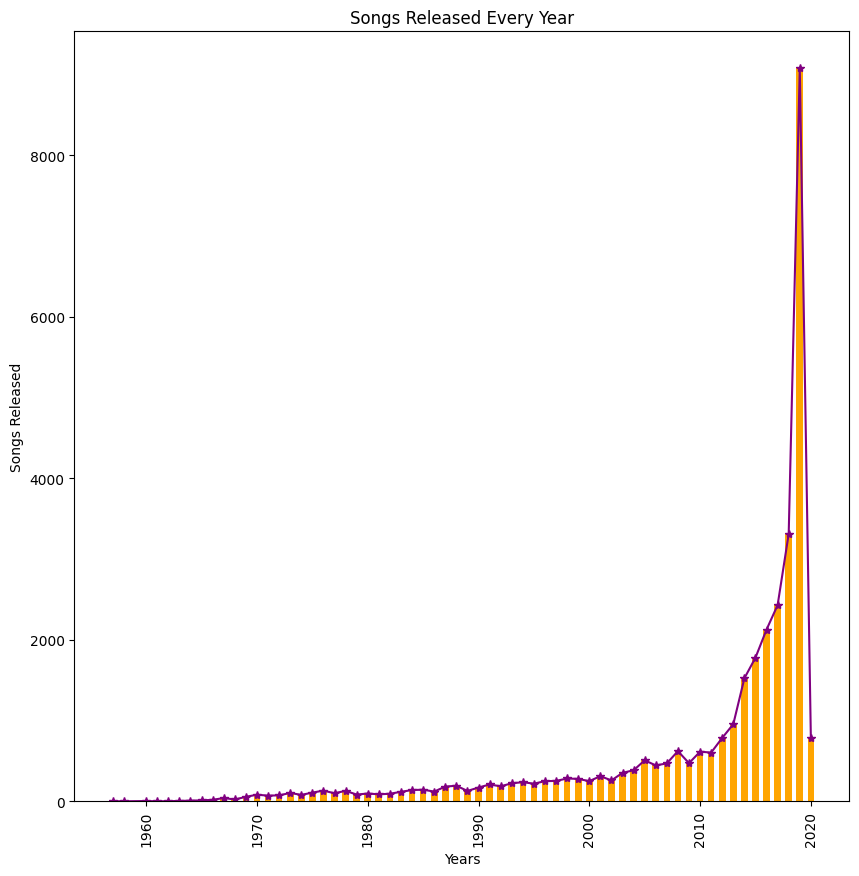

In [24]:
fig = plt.figure(figsize = (10, 10))

plt.bar(
    x = sorted_years_count.keys(),
    height = sorted_years_count.values(),
    width = 0.6,
    color = "orange"
)

plt.plot(
    sorted_years_count.keys(),
    sorted_years_count.values(),
    marker = '*',
    color = "purple"
)

plt.xticks(rotation = 90)
plt.xlabel("Years")
plt.ylabel("Songs Released")
plt.title("Songs Released Every Year")

In [25]:
songs_genre : dict = {}

for genre in df["playlist_genre"].values:

  if genre in songs_genre:
    songs_genre[genre] += 1

  else:
    songs_genre[genre] = 1

In [26]:
sorted_genre_count : dict = dict(
    sorted(
        songs_genre.items(),
        key = lambda x : x[1],
        reverse = False
        )
    )

In [27]:
sorted_genre_count

{'rock': 4951,
 'latin': 5155,
 'r&b': 5431,
 'pop': 5507,
 'rap': 5746,
 'edm': 6043}

Text(0, 0.5, 'Number Of Popular Songs')

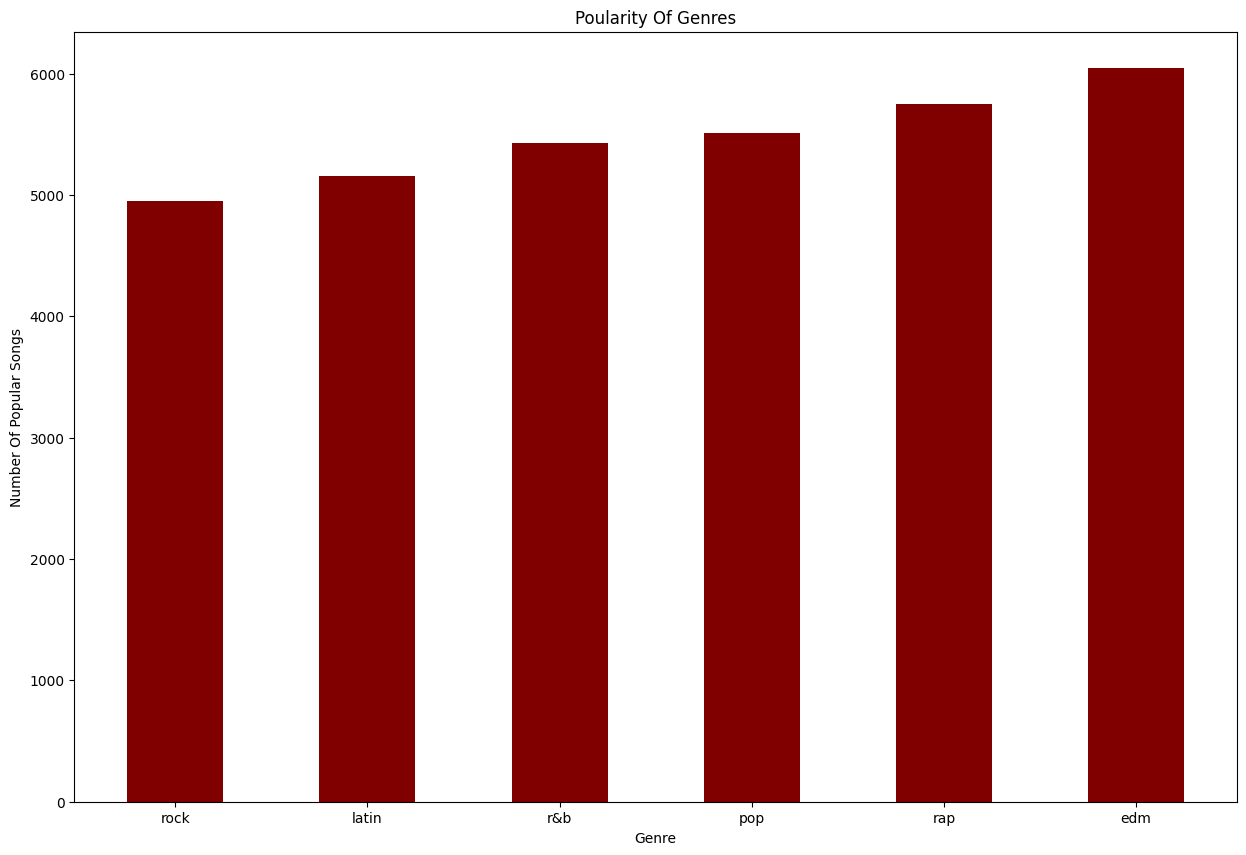

In [28]:
fig = plt.figure(figsize = (15, 10))

plt.bar(
    x = sorted_genre_count.keys(),
    height = sorted_genre_count.values(),
    width = 0.5,
    color = "maroon"
)

plt.title("Poularity Of Genres")
plt.xlabel("Genre")
plt.ylabel("Number Of Popular Songs")

In [29]:
genre_labels : dict = {
    "rock" : 0,
    "latin" : 1,
    "r&b" : 2,
    "pop" : 3,
    "rap" : 4,
    "edm" : 5
}

In [30]:
df["playlist_genre_encoded"] = [
    genre_labels[genre]
    for genre in df["playlist_genre"].values
    ]

In [31]:
songs_subgenre : dict = {}

for subgenre in df["playlist_subgenre"].values:

  if subgenre in songs_subgenre:
    songs_subgenre[subgenre] += 1

  else:
    songs_subgenre[subgenre] = 1

In [32]:
sorted_subgenre_count : dict = dict(
    sorted(
        songs_subgenre.items(),
        key = lambda x : x[1],
        reverse = False
        )
    )

In [33]:
sorted_subgenre_count

{'reggaeton': 949,
 'album rock': 1065,
 'permanent wave': 1105,
 'post-teen pop': 1129,
 'new jack swing': 1133,
 'big room': 1206,
 'hip pop': 1256,
 'latin pop': 1262,
 'tropical': 1288,
 'trap': 1291,
 'classic rock': 1296,
 'dance pop': 1298,
 'hip hop': 1322,
 'urban contemporary': 1405,
 'electropop': 1408,
 'gangster rap': 1458,
 'hard rock': 1485,
 'electro house': 1511,
 'pop edm': 1517,
 'neo soul': 1637,
 'latin hip hop': 1656,
 'indie poptimism': 1672,
 'southern hip hop': 1675,
 'progressive electro house': 1809}

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, 'reggaeton'),
  Text(1, 0, 'album rock'),
  Text(2, 0, 'permanent wave'),
  Text(3, 0, 'post-teen pop'),
  Text(4, 0, 'new jack swing'),
  Text(5, 0, 'big room'),
  Text(6, 0, 'hip pop'),
  Text(7, 0, 'latin pop'),
  Text(8, 0, 'tropical'),
  Text(9, 0, 'trap'),
  Text(10, 0, 'classic rock'),
  Text(11, 0, 'dance pop'),
  Text(12, 0, 'hip hop'),
  Text(13, 0, 'urban contemporary'),
  Text(14, 0, 'electropop'),
  Text(15, 0, 'gangster rap'),
  Text(16, 0, 'hard rock'),
  Text(17, 0, 'electro house'),
  Text(18, 0, 'pop edm'),
  Text(19, 0, 'neo soul'),
  Text(20, 0, 'latin hip hop'),
  Text(21, 0, 'indie poptimism'),
  Text(22, 0, 'southern hip hop'),
  Text(23, 0, 'progressive electro house')])

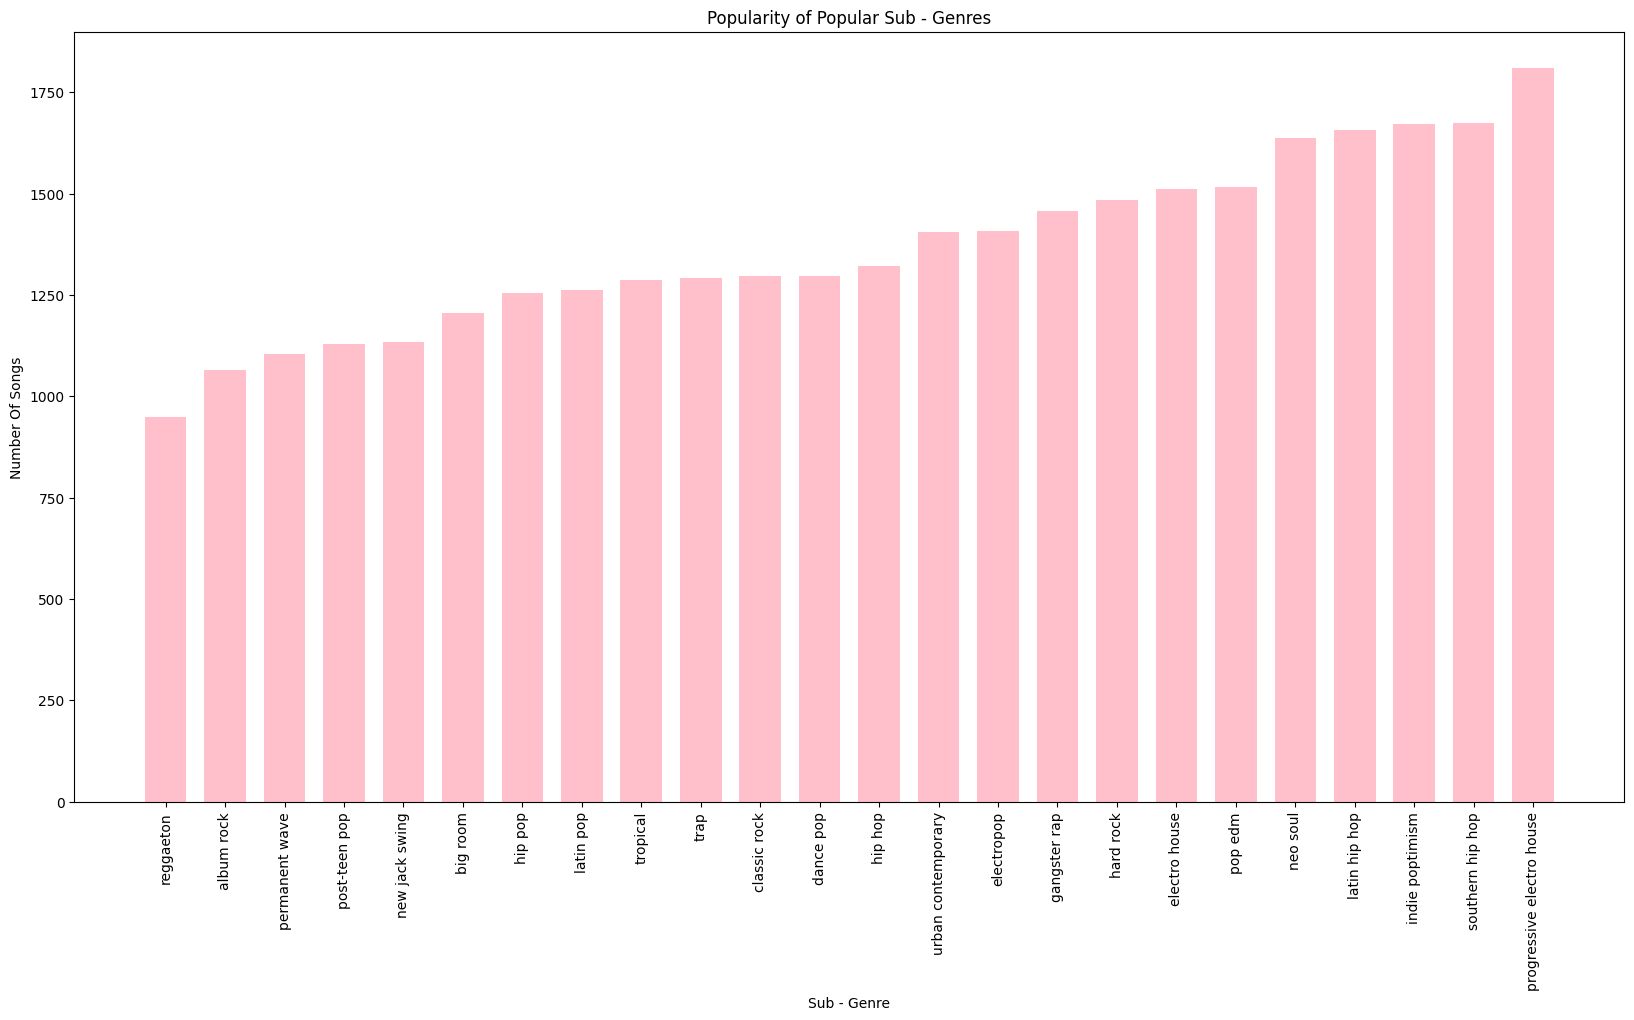

In [34]:
fig = plt.figure(figsize = (20, 10))

plt.bar(
    x = sorted_subgenre_count.keys(),
    height = sorted_subgenre_count.values(),
    width = 0.7,
    color = "pink"
)

plt.xlabel("Sub - Genre")
plt.ylabel("Number Of Songs")
plt.title("Popularity of Popular Sub - Genres")
plt.xticks(rotation = 90)

In [35]:
df.drop("playlist_name", axis = 1, inplace = True)

In [36]:
# Correlation Matrix
cm = df.corr()
cm["track_popularity"].sort_values(ascending = True)

<ipython-input-36-16d1c98f2259>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = df.corr()


instrumentalness           -0.149872
duration_ms                -0.143682
energy                     -0.109112
playlist_genre_encoded     -0.083684
liveness                   -0.054584
tempo                      -0.005378
key                        -0.000650
speechiness                 0.006819
mode                        0.010637
valence                     0.033231
loudness                    0.057687
track_album_release_year    0.060744
danceability                0.064748
acousticness                0.085159
track_popularity            1.000000
Name: track_popularity, dtype: float64

# **Information Inferred From The Data**

* Most popular song (2020) - **Dance Monkey**

* Most popular artist (2020, Based On The Number Of Songs He/She Has In The Top 107 List) - **Travis Scott**

* Artist with most number of published songs (quantity) - **Martin Garrix**

* The year in which most songs were released - **2019**

* Most popular genre (2020) - **EDM (Electronic Dance Music)**

* Most popular subgenre (2020) - **Progressive Electro House**

* None of the data columns is directly linked with the popularity of a song.

* It is seen that the duration and instrumentalness of a song is inversely proportional to its popularity, though not linearly.